# Chatbots
A chatbot is a text-based dialog system allowing the interaction with a computer system.
The system reacts on natural language text input by triggering actions and/or
replying with a text in natural language. Chatbots can be used in conjunction with an
avatar, i.e., they mimic a certain character and personality (e.g., ELIZA simulates a psychotherapist). 
Powered by NLP, chatbots are the foundation of digital assistants (e.g.,
Google Assistant, Amazon’s Alexa). Furthermore, they are often used through messenger
apps (e.g., Facebook Messenger, WhatsApp), organizational tools, and websites [[1]](#scrollTo=eu4Cqre4h01L).

## Chatbot with Rasa library

In this section, we will demonstrate a simple chatbot with the python library ``rasa``. ``rasa`` is an open source machine learning framework for automated text and voice-based conversations. Understand messages, hold conversations, and connect to messaging channels and APIs.
For more information about ``rasa``, please refer to  [[2]](https://rasa.com/docs/rasa/) and [[3]](https://github.com/RasaHQ/rasa-demo).

The following example is based on [[4]](https://rasa.com/docs/rasa/jupyter-notebooks/).

### Install ``rasa`` module

In [1]:
# Install rasa module
!pip install rasa==1.10.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 510 kB 8.1 MB/s 
     |████████████████████████████████| 60 kB 9.2 MB/s 
     |████████████████████████████████| 111 kB 52.3 MB/s 
     |████████████████████████████████| 148 kB 21.1 MB/s 
     |████████████████████████████████| 979 kB 55.9 MB/s 
     |████████████████████████████████| 1.3 MB 57.6 MB/s 
     |████████████████████████████████| 40 kB 7.5 MB/s 
     |████████████████████████████████| 448 kB 73.6 MB/s 
     |████████████████████████████████| 149 kB 73.9 MB/s 
     |████████████████████████████████| 1.2 MB 63.6 MB/s 
     |████████████████████████████████| 375 kB 72.5 MB/s 
     |████████████████████████████████| 40 kB 6.4 MB/s 
     |████████████████████████████████| 47 kB 5.7 MB/s 
     |████████████████████████████████| 340 kB 76.0 MB/s 
     |████████████████████████████████| 132 kB 70.3 MB/s 
     |████████████████████████████████| 

In [2]:
!pip install -U tables==3.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 8.2 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.7.0
    Uninstalling tables-3.7.0:
      Successfully uninstalled tables-3.7.0


### Install ``ipython``

Due to the ``rasa`` installation, ``ipython``
 must also be reinstalled.

In [3]:
# NOTE: By the end of the insatallation, it might ask for restarting the runtime...
## In this case, just click the "RESTART RUNTIME" button.

!pip install -U ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 6.7 MB/s 
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 2.0.10 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [1]:

!python -m spacy download en

2022-07-26 13:49:30.447708: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-07-26 13:49:30.448784: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-07-26 13:49:30.448807: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

### Load Resources

In [2]:
!pip install nest_asyncio==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.5.5
    Uninstalling nest-asyncio-1.5.5:
      Successfully uninstalled nest-asyncio-1.5.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.6.6 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.
nbclient 0.6.6 requires traitlets>=5.2.2, but you have traitlets 5.1.1 which is incompatible.


In [3]:
import os
import rasa
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [4]:
from rasa.cli.scaffold import create_initial_project

In [5]:
project = "test-project"
create_initial_project(project)

In [6]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['data', 'endpoints.yml', 'domain.yml', '__pycache__', 'credentials.yml', 'config.yml', 'tests', '__init__.py', 'actions.py']


In [7]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


In [8]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 102.42it/s, # actions=16]
Processed actions: 16it [00:00, 801.63it/s, # examples=16]
Epochs: 100%|██████████| 100/100 [00:11<00:00,  8.34it/s, t_loss=0.073, loss=0.002, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs: 100%|██████████| 100/100 [00:05<00:00, 17.21it/s, t_loss=1.490, i_loss=0.121, i_acc=1.000]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20220726-135145.tar.gz'.
models/20220726-135145.tar.gz


In [10]:
from rasa.jupyter import chat

endpoints = 'endpoints.yml'

chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
Hello!
Hey! How are you?
I am fine
Great, carry on!
What are you exactly?
I am a bot, powered by Rasa.
I should go now, see you later!
Bye
/stop


### Train model

### Launch chatbot

### Evaluate the model

In [11]:
import rasa.shared.data as data
#
nlu_data_directory = data.get_data_files('/content/test-project', rasa.shared.data.is_nlu_file)
stories_directory = data.get_data_files('/content/test-project', rasa.shared.data.is_story_file)
print(stories_directory, nlu_data_directory)

ModuleNotFoundError: ignored

/usr/local/lib/python3.7/dist-packages/rasa/utils/train_utils.py:535: UserWarning: model_confidence is set to `softmax`. It is recommended to try using `model_confidence=linear_norm` to make it easier to tune fallback thresholds.
  category=UserWarning,


/usr/local/lib/python3.7/dist-packages/rasa/shared/utils/io.py:96: UserWarning: Issue found in '/content/test-project/data/stories.yml': 
Found intent 'greet' in stories which is not part of the domain.
  More info at https://rasa.com/docs/rasa/stories
/usr/local/lib/python3.7/dist-packages/rasa/shared/utils/io.py:96: UserWarning: Issue found in '/content/test-project/data/stories.yml': 
Found intent 'mood_great' in stories which is not part of the domain.
  More info at https://rasa.com/docs/rasa/stories
/usr/local/lib/python3.7/dist-packages/rasa/shared/utils/io.py:96: UserWarning: Issue found in '/content/test-project/data/stories.yml': 
Found intent 'mood_unhappy' in stories which is not part of the domain.
  More info at https://rasa.com/docs/rasa/stories
/usr/local/lib/python3.7/dist-packages/rasa/shared/utils/io.py:96: UserWarning: Issue found in '/content/test-project/data/stories.yml': 
Found intent 'affirm' in stories which is not part of the domain.
  More info at https://ra

/usr/local/lib/python3.7/dist-packages/rasa/utils/train_utils.py:535: UserWarning: model_confidence is set to `softmax`. It is recommended to try using `model_confidence=linear_norm` to make it easier to tune fallback thresholds.
  category=UserWarning,
100%|██████████| 69/69 [00:01<00:00, 67.97it/s]
/usr/local/lib/python3.7/dist-packages/rasa/utils/plotting.py:194: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  axes[1].set(yticks=yticks, xlim=(0, max_xlims[1]), ylim=(min_ylim, max_ylim))


Done testing.


<Figure size 1440x1440 with 0 Axes>

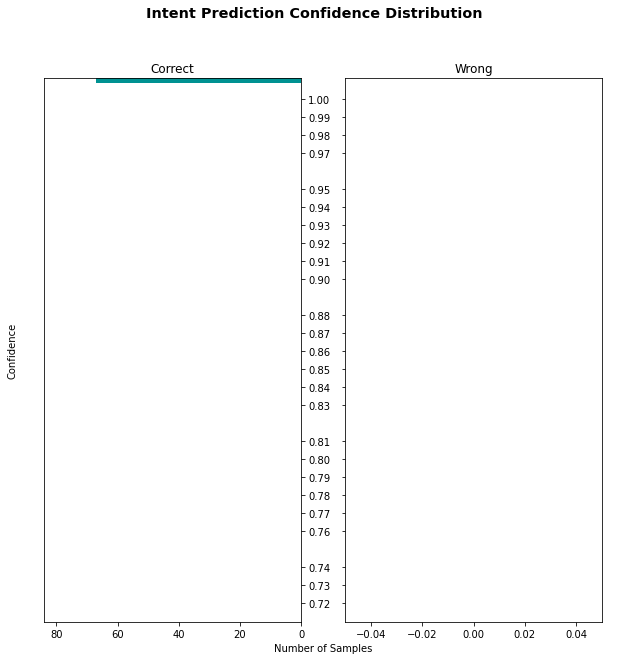

In [ ]:
rasa.test(model_path, stories_directory[1], nlu_data_directory[0])
print("Done testing.")

In [ ]:
if os.path.isfile("errors.json"):
    print("NLU Errors:")
    print(open("errors.json").read())
else:
    print("No NLU errors.")

if os.path.isdir("results"):
      print("\n")
      print("Core Errors:")
      print(open("results/failed_test_stories.yml").read())

No NLU errors.


Core Errors:
# None of the test stories failed - all good!


# **References**

- [1] NLP and Computer Vision_DLMAINLPCV01 Course Book
- [2] https://rasa.com/docs/rasa/
- [3] https://github.com/RasaHQ/rasa-demo
- [4] https://rasa.com/docs/rasa/jupyter-notebooks/

https://notebooks.githubusercontent.com/view/ipynb?browser=unknown_browser&color_mode=auto&commit=b4f29edc53cf500cb922c5f937ce9eb776c28bfb&device=unknown_device&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f73616966653234352f526173615f43686174626f742f623466323965646335336366353030636239323263356639333763653965623737366332386266622f526173615f496e697469616c5f63686174626f742e6970796e62&logged_in=false&nwo=saife245%2FRasa_Chatbot&path=Rasa_Initial_chatbot.ipynb&platform=unknown_platform&repository_id=336785452&repository_type=Repository&version=0

Copyright © 2022 IU International University of Applied Sciences